In [1]:
# Load the modules
import pickle
import math

import numpy as np
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
signs=pd.read_csv('traffic_signnames.csv')
signs

Class                                               Desc
0       0                               Speed limit (20km/h)
1       1                               Speed limit (30km/h)
2       2                               Speed limit (50km/h)
3       3                               Speed limit (60km/h)
4       4                               Speed limit (70km/h)
5       5                               Speed limit (80km/h)
6       6                        End of speed limit (80km/h)
7       7                              Speed limit (100km/h)
8       8                              Speed limit (120km/h)
9       9                                         No passing
10     10       No passing for vehicles over 3.5 metric tons
11     11              Right-of-way at the next intersection
12     12                                      Priority road
13     13                                              Yield
14     14                                               Stop
15     15                                        No vehicles
16     16           Vehicles over 3.5 metric tons prohibited
17     17                                           No entry
18     18                                    General caution
19     19                        Dangerous curve to the left
20     20                       Dangerous curve to the right
21     21                                       Double curve
22     22                                         Bumpy road
23     23                                      Slippery road
24     24                          Road narrows on the right
25     25                                          Road work
26     26                                    Traffic signals
27     27                                        Pedestrians
28     28                                  Children crossing
29     29                                  Bicycles crossing
30     30                                 Beware of ice/snow
31     31                              Wild animals crossing
32     32                End of all speed and passing limits
33     33                                   Turn right ahead
34     34                                    Turn left ahead
35     35                                         Ahead only
36     36                               Go straight or right
37     37                                Go straight or left
38     38                                         Keep right
39     39                                          Keep left
40     40                               Roundabout mandatory
41     41                                  End of no passing
42     42  End of no passing by vehicles over 3.5 metric ...

In [3]:
with open('traffic_train.p', 'rb') as f:
    data = pickle.load(f)

    # TODO: Load the feature data to the variable X, label data to the variable y
    X, y= data['features'], data['labels']
    
    del data # free up memory

In [4]:
X.shape

(39209, 32, 32, 3)

In [5]:
%matplotlib inline
        
def plot_figures(img_list,labels, nrows=1, ncols=1):
    ''' takes a list of images and plots them in nrows x ncols frame'''
    fig=plt.figure(figsize=(50,40))
    for i, img in enumerate(img_list):
        fig.add_subplot(nrows,ncols,i+1)
        plt.imshow(img)
        plt.title(labels[i], {'fontsize': 30})
        plt.axis('off')

In [6]:
imgs=[]
import random
s=[random.randrange(0,39000) for i in range(20)]
labels=list(signs.loc[y[s]]['Desc'])

for i in s:
    img=X[i,:, :]
    imgs.append(img)

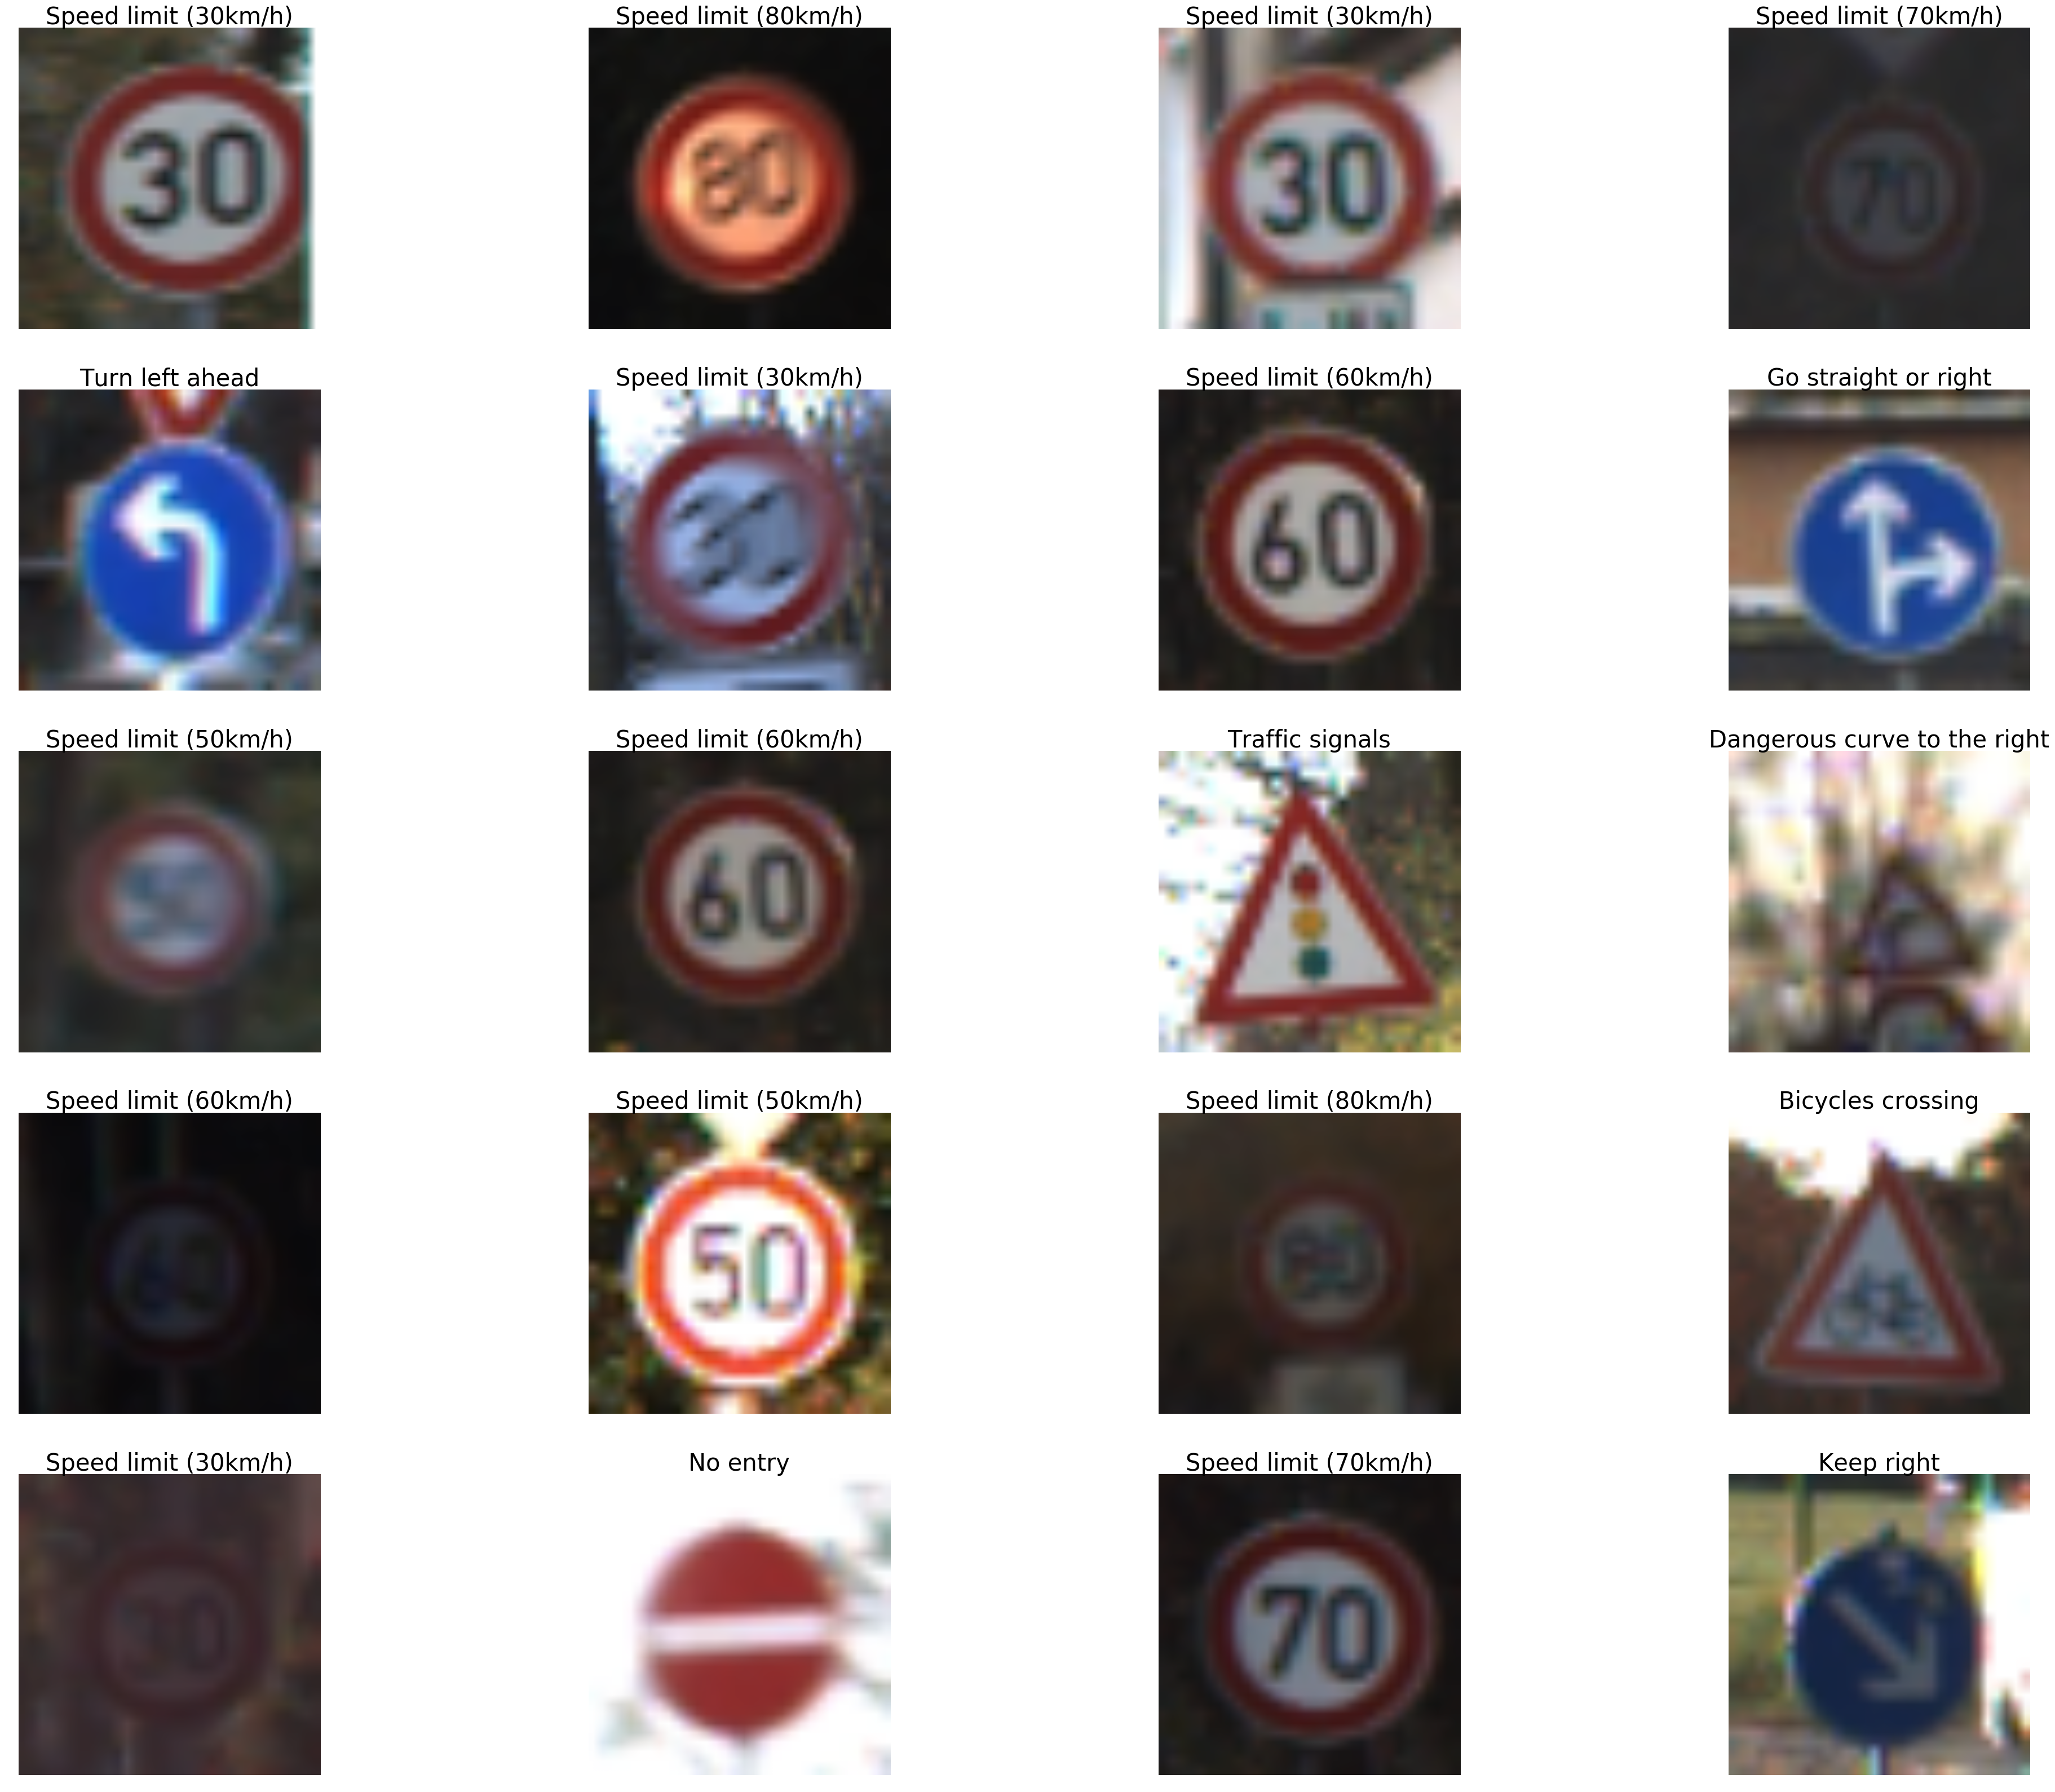

In [7]:
plot_figures(imgs,labels, nrows=5, ncols=4)

In [8]:
from sklearn.utils import shuffle
X, y=shuffle(X, y)

In [17]:
X_norm=X/255

# TODO: One Hot encode the labels to the variable y_one_hot
from sklearn.preprocessing import OneHotEncoder #, LabelBinarizer
#encoder = LabelBinarizer()
encoder=OneHotEncoder()
encoder.fit(y.reshape(-1,1))

y_one_hot = encoder.transform(y.reshape(-1,1)).todense()


In [18]:
X_norm.shape, y_one_hot.shape

((39209, 32, 32, 3), (39209, 43))

In [87]:
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers import Input
from keras.layers.convolutional import Conv2D, MaxPooling2D

def DNN():
    input_shape=(32, 32, 3)
    img_input = Input(shape=input_shape)
    # Block 1
    x= Flatten()(img_input)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(43, activation='softmax')(x)
    
    model = Model(inputs=img_input, outputs=predictions)
    
    return model

def CNN():
    model=Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
    model.add(Conv2D(32, (3, 3),  activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(128,  activation='relu'))
    model.add(Dense(43,  activation='softmax'))
    
    return model
              
    

In [34]:
dnn_model=DNN()
dnn_model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [36]:
dnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_14 (Dense)             (None, 43)                5547      
Total params: 398,891
Trainable params: 398,891
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = dnn_model.fit(X_norm, y_one_hot, batch_size=90, epochs=5, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 1s - loss: 2.3785 - acc: 0.4850 - val_loss: 2.6260 - val_acc: 0.3950
Epoch 2/5
800/800 [==============================] - 1s - loss: 2.2591 - acc: 0.5000 - val_loss: 2.4904 - val_acc: 0.4100
Epoch 3/5
800/800 [==============================] - 1s - loss: 2.1564 - acc: 0.5425 - val_loss: 2.4997 - val_acc: 0.3950
Epoch 4/5
800/800 [==============================] - 1s - loss: 2.0868 - acc: 0.5438 - val_loss: 2.3848 - val_acc: 0.4000
Epoch 5/5
800/800 [==============================] - 1s - loss: 1.9821 - acc: 0.5800 - val_loss: 2.2935 - val_acc: 0.4100


In [78]:
signs[signs['Class']==actual_index]['Desc']

21    Double curve
Name: Desc, dtype: object

9 No passing 9 No passing


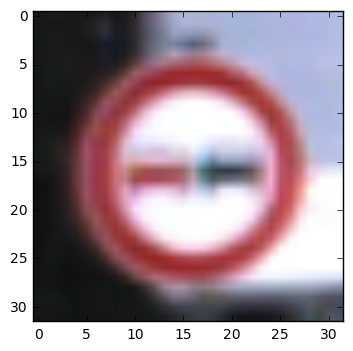

In [80]:
index=33
class_pred_index=dnn_model.predict(X_norm[index].reshape(1,32,32,3)).argmax()
actual_index=y_one_hot[index].argmax()
pred=list(signs[signs['Class']==class_pred_index]['Desc'])[0]
actual=list(signs[signs['Class']==actual_index]['Desc'])[0]
print(class_pred_index, pred, actual_index, actual)
plt.imshow(X_norm[index])

In [88]:
cnn_model=CNN()
cnn_model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [89]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_18 (Dense)             (None, 43)                5547      
Total params: 818,635
Trainable params: 818,635
Non-trainable params: 0
_________________________________________________________________


In [95]:
%%time
history = cnn_model.fit(X_norm[:10000], y_one_hot[:10000], batch_size=200, epochs=5, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 174s - loss: 1.5562 - acc: 0.5955 - val_loss: 1.1240 - val_acc: 0.6975
Epoch 2/5
8000/8000 [==============================] - 174s - loss: 0.7880 - acc: 0.7985 - val_loss: 0.7339 - val_acc: 0.7875
Epoch 3/5
8000/8000 [==============================] - 167s - loss: 0.5038 - acc: 0.8694 - val_loss: 0.4782 - val_acc: 0.8775
Epoch 4/5
8000/8000 [==============================] - 180s - loss: 0.3249 - acc: 0.9214 - val_loss: 0.3906 - val_acc: 0.8920
Epoch 5/5
8000/8000 [==============================] - 189s - loss: 0.2247 - acc: 0.9509 - val_loss: 0.3278 - val_acc: 0.9135
Wall time: 14min 47s


(39209, 32, 32, 3)

In [100]:
with open('traffic_test.p', 'rb') as f:
    data = pickle.load(f)

    # TODO: Load the feature data to the variable X, label data to the variable y
    X_test, y_test= data['features'], data['labels']
    
    del data # free up memory

In [101]:
X_test.shape, y_test.shape

((12630, 32, 32, 3), (12630,))

In [103]:
XX= X_test/255
yy = encoder.transform(y_test.reshape(-1,1)).todense()
XX.shape, yy.shape

((12630, 32, 32, 3), (12630, 43))

In [104]:
cnn_model.evaluate(XX, yy, batch_size=200)

12630/12630 [==============================] - 86s    


[0.64385093037136376, 0.83911322056067339]